In [157]:
# ANALYSIS

# Mice treated with Capomulin and Ramicane had the smallest tumors (lowest mean tumor volume)
    # The box plot supports that these findings are consistent since there are no outliers for these two drugs
    # The bar graph shows that a greater number of mice were treated with these two drugs
    
# The line graph for mouse l509 shows that tumor volume decreases over time

# The scatter plot shows that tumor volume is larger in heavier mice 
    # There is a strong positive correlation (r = 0.84) between mouse weight and average tumor volume

In [158]:
# import necessary libraries
import matplotlib.pyplot as plt
import pandas as pd 
import scipy.stats as st
from scipy.stats import linregress

In [159]:
# read csv files using pandas 
mouse_metadata_csv = pd.read_csv("data/Mouse_metadata.csv")
study_results_csv = pd.read_csv("data/Study_results.csv")

In [160]:
# observe data to determine what to merge on (Mouse ID)
mouse_metadata_csv.head()
study_results_csv.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [161]:
# combine into single dataset 
merged_data = pd.merge(mouse_metadata_csv, study_results_csv, on="Mouse ID")
merged_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [162]:
# check number of mice 
mouse_count = len(merged_data["Mouse ID"].unique())
mouse_count

249

In [163]:
# get duplicate mice by ID number that shows up for Mouse ID and Timepoint
duplicate_mice = merged_data.loc[merged_data.duplicated(subset=["Mouse ID", "Timepoint",]),"Mouse ID"].unique()
duplicate_mice

array(['g989'], dtype=object)

In [164]:
# get all data for the duplicate Mouse ID
duplicate_mouse_df = merged_data.loc[merged_data["Mouse ID"] == "g989",:]
duplicate_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [165]:
# create a clean dataframe by dropping the duplicate mouse by its ID 
clean_df = merged_data[merged_data['Mouse ID'].isin(duplicate_mice)==False]
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [166]:
# count number of mice in clean dataframe
clean_mouse_count = len(clean_df["Mouse ID"].unique())
clean_mouse_count

248

In [167]:
### SUMMARY STATISTICS 

In [168]:
# calculate mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# first group dataset by Drug Regime
drug_regimen_df = clean_df.groupby("Drug Regimen")

# or could do
    # mean = clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).mean()

# calculate 
mean = drug_regimen_df["Tumor Volume (mm3)"].mean()
median = drug_regimen_df["Tumor Volume (mm3)"].median()
var = drug_regimen_df["Tumor Volume (mm3)"].var()
std = drug_regimen_df["Tumor Volume (mm3)"].std()
sem = drug_regimen_df["Tumor Volume (mm3)"].sem()

In [169]:
# generate summary statistics dataframe 
summary_stats_df = pd.DataFrame({"Mean Tumor Volume": mean, "Median Tumor Volume": median, 
                                 "Tumor Volume Variance": var, "Tumor Volume Std. Dev.": std, 
                                 "Tumor Volume Std. Err.": sem})
summary_stats_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [170]:
# use aggregation method to produce same summary stats dataframe in a single line 
summary_stats_agg = clean_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_stats_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

In [171]:
### BAR AND PIE CHARTS 

In [172]:
# generate bar plot showing the total number of timepoints for all mice tested for each drug regimen (pandas)
mice_count = clean_df["Drug Regimen"].value_counts()
mice_count

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

<AxesSubplot: xlabel='Drug Regimen', ylabel='Number of Mice'>

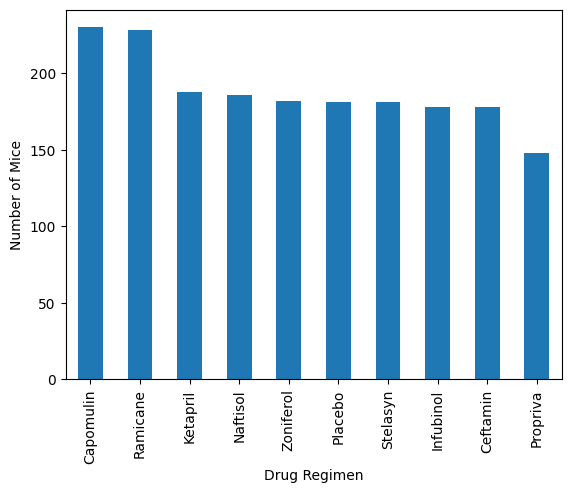

In [173]:
drug_barchart = mice_count.plot.bar()
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
drug_barchart

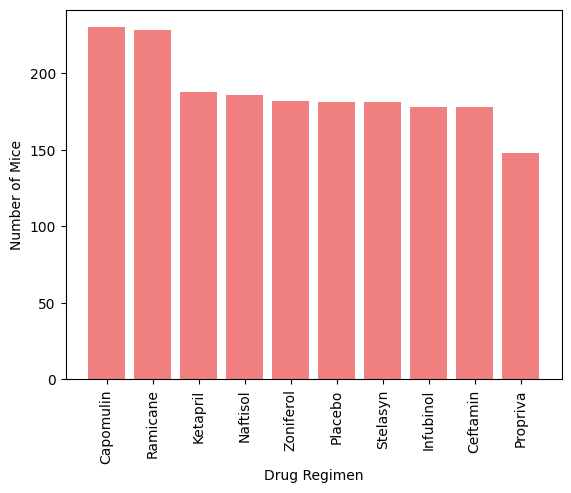

In [174]:
# generate bar plot showing the total umber of timepoints for all mice tested for each drug regimen (pyplot)
x_axis = mice_count.index.values
y_axis = mice_count.values

plt.bar(x_axis, y_axis, facecolor='Lightcoral', alpha=1, align='center')

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.xticks(rotation="vertical")

plt.show()

In [175]:
# generate a pie plot showing the distribution of female vs male mice (pandas)
gender_count = clean_df["Sex"].value_counts()
gender_count

Male      958
Female    922
Name: Sex, dtype: int64

<AxesSubplot: ylabel='Sex'>

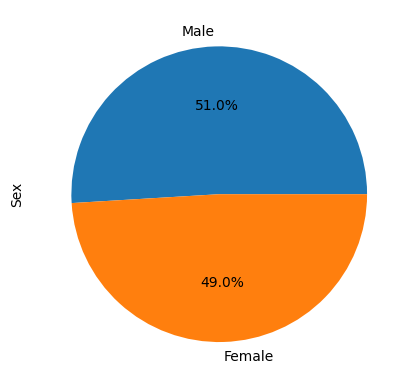

In [176]:
gender_pie = gender_count.plot.pie(autopct="%1.1f%%")
gender_pie

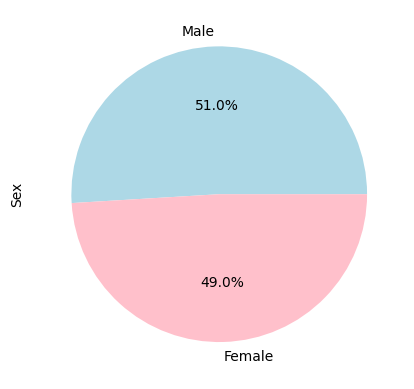

In [177]:
# generate a pie plot showing the distribution of female vs male mice (pyplot)
labels = ['Male', 'Female']
sizes = gender_count 
colors = ["lightblue", "pink"]
plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%")
plt.ylabel("Sex")
plt.show()

In [178]:
### QUARTILES, OUTLIERS AND BOXPLOTS 

In [179]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

In [180]:
# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = clean_df.groupby('Mouse ID')['Timepoint'].max()
last_timepoint

Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
        ..
z435    10
z578    45
z581    45
z795    45
z969    45
Name: Timepoint, Length: 248, dtype: int64

In [181]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
timepoint_df = pd.DataFrame(last_timepoint)
timepoint_merge = pd.merge(timepoint_df, clean_df, on=("Mouse ID", "Timepoint"))
timepoint_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [182]:
# put treatments into a list for for loop (and later plot labels)
treatment = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# create an empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

In [183]:
# locate the rows which contain mice on each drug and get the tumor volumes 
for treatment in treatment:
    drug_regimen = timepoint_merge.loc[timepoint_merge["Drug Regimen"] == treatment]
    tumor_vol = drug_regimen['Tumor Volume (mm3)']
    tumor_vol_data.append(tumor_vol)

In [184]:
# calculate the IQR and quantitatively determine if there are any potential outliers
capomulin_quartile = tumor_vol_data[0].quantile([.25,.5,.75])
capomulin_lowerq = capomulin_quartile[0.25]
capomulin_upperq = capomulin_quartile[0.75]
capomulin_iqr = capomulin_upperq - capomulin_lowerq

ramicane_quartile = tumor_vol_data[1].quantile([.25,.5,.75])
ramicane_lowerq = ramicane_quartile[0.25]
ramicane_upperq = ramicane_quartile[0.75]
ramicane_iqr = ramicane_upperq - ramicane_lowerq

infubinol_quartile = tumor_vol_data[2].quantile([.25,.5,.75])
infubinol_lowerq = infubinol_quartile[0.25]
infubinol_upperq = infubinol_quartile[0.75]
infubinol_iqr = infubinol_upperq - infubinol_lowerq

ceftamin_quartile = tumor_vol_data[3].quantile([.25,.5,.75])
ceftamin_lowerq = ceftamin_quartile[0.25]
ceftamin_upperq = ceftamin_quartile[0.75]
ceftamin_iqr = ceftamin_upperq - ceftamin_lowerq

# determine outliers using upper and lower bounds 
# potential outliers are anything above the upper bound and anything below the lower bound
capomulin_lower_bound = capomulin_lowerq - (1.5*capomulin_iqr)
capomulin_upper_bound = capomulin_upperq + (1.5*capomulin_iqr)

ramicane_lower_bound = ramicane_lowerq - (1.5*ramicane_iqr)
ramicane_upper_bound = ramicane_upperq + (1.5*ramicane_iqr)

infubinol_lower_bound = infubinol_lowerq - (1.5*infubinol_iqr)
infubinol_upper_bound = infubinol_upperq + (1.5*infubinol_iqr)

ceftamin_lower_bound = ceftamin_lowerq - (1.5*ceftamin_iqr)
ceftamin_upper_bound = ceftamin_upperq + (1.5*ceftamin_iqr)

# print potential outliers

print(f"Capomulin's potential outliers: values below {capomulin_lower_bound} and values above {capomulin_upper_bound}")
print(f"Ramicane's potential outliers: values below {ramicane_lower_bound} and values above {ramicane_upper_bound}")
print(f"Infubinol's potential outliers: values below {infubinol_lower_bound} and values above {infubinol_upper_bound}")
print(f"Ceftamin's potential outliers: values below {ceftamin_lower_bound} and values above {ceftamin_upper_bound}")

Capomulin's potential outliers: values below 20.70456164999999 and values above 51.83201549
Ramicane's potential outliers: values below 17.912664470000003 and values above 54.30681135
Infubinol's potential outliers: values below 36.83290494999999 and values above 82.74144559000001
Ceftamin's potential outliers: values below 25.355449580000002 and values above 87.66645829999999


In [185]:
# determine number of outliers per drug regimen
capomulin_df = timepoint_merge.loc[timepoint_merge['Drug Regimen']=='Capomulin']
capomulin_outlier = capomulin_df.loc[(capomulin_df['Tumor Volume (mm3)'] < capomulin_lower_bound) | (capomulin_df['Tumor Volume (mm3)'] > capomulin_upper_bound)]

ramicane_df = timepoint_merge.loc[timepoint_merge['Drug Regimen']=='Ramicane']
ramicane_outlier = ramicane_df.loc[(ramicane_df['Tumor Volume (mm3)'] < ramicane_lower_bound) | (ramicane_df['Tumor Volume (mm3)'] > ramicane_upper_bound)]

infubinol_df = timepoint_merge.loc[timepoint_merge['Drug Regimen']=='Infubinol']
infubinol_outlier = infubinol_df.loc[(infubinol_df['Tumor Volume (mm3)'] < infubinol_lower_bound) | (infubinol_df['Tumor Volume (mm3)'] > infubinol_upper_bound)]

ceftamin_df = timepoint_merge.loc[timepoint_merge['Drug Regimen']=='Ceftamin']
ceftamin_outlier = ceftamin_df.loc[(ceftamin_df['Tumor Volume (mm3)'] < ceftamin_lower_bound) | (ceftamin_df['Tumor Volume (mm3)'] > ceftamin_upper_bound)]

In [186]:
capomulin_outlier_count = len(capomulin_outlier)
ramicane_outlier_count = len(ramicane_outlier)
infubinol_outlier_count = len(infubinol_outlier)
ceftamin_outlier_count = len(ceftamin_outlier)

print(f"Number of Capomulin outliers: {capomulin_outlier_count}")
print(f"Number of Ramicane outliers: {ramicane_outlier_count}")
print(f"Number of Infubinol outliers: {infubinol_outlier_count}")
print(f"Number of Ceftamin outliers: {ceftamin_outlier_count}")

Number of Capomulin outliers: 0
Number of Ramicane outliers: 0
Number of Infubinol outliers: 1
Number of Ceftamin outliers: 0


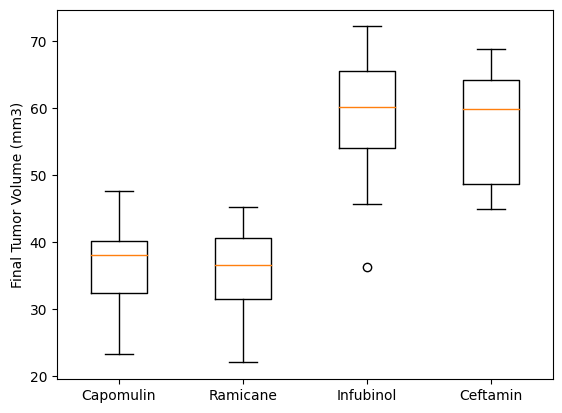

In [187]:
# generate a box plot that shows the distribution of the tumor volume for each treatment group

# tumor_vol_data (empty list we created)
labels = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

fig1, ax1 = plt.subplots()
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.boxplot(tumor_vol_data, labels=labels)
plt.show()

In [188]:
### LINE AND SCATTER PLOTS

In [189]:
# create a line plot of tumor volume vs. time point for a mouse treated with Capomulin (mouse l509)

# list of mice that were treated with Capomilin
capomulin_mice = clean_df.loc[clean_df["Drug Regimen"]== "Capomulin"]
capomulin_mice.value_counts("Mouse ID")

Mouse ID
b128    10
b742    10
x401    10
w914    10
v923    10
u364    10
t565    10
s710    10
s185    10
r944    10
r554    10
m957    10
m601    10
l897    10
l509    10
j119    10
i738    10
i557    10
g316    10
g288    10
y793    10
j246     8
f966     5
r157     4
w150     3
dtype: int64

In [190]:
# select mouse l509 
capomulin_mouse = clean_df.loc[clean_df["Mouse ID"] == "l509"]
capomulin_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
371,l509,Capomulin,Male,17,21,0,45.000000,0
372,l509,Capomulin,Male,17,21,5,45.851193,0
373,l509,Capomulin,Male,17,21,10,46.759074,0
374,l509,Capomulin,Male,17,21,15,47.488599,1
375,l509,Capomulin,Male,17,21,20,48.070452,2
376,l509,Capomulin,Male,17,21,25,44.006257,2
377,l509,Capomulin,Male,17,21,30,44.708055,2
378,l509,Capomulin,Male,17,21,35,40.207288,2
379,l509,Capomulin,Male,17,21,40,40.770813,2
380,l509,Capomulin,Male,17,21,45,41.483008,3


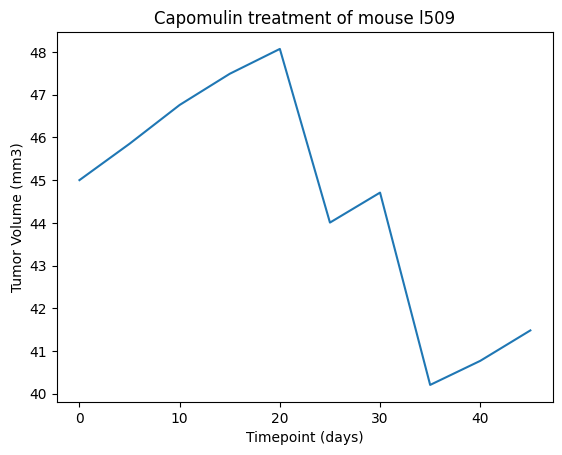

In [191]:
# generate line plot
x_axis = capomulin_mouse["Timepoint"]
y_axis = capomulin_mouse["Tumor Volume (mm3)"]

plt.title("Capomulin treatment of mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")

plt.plot(x_axis, y_axis)
plt.show()

In [192]:
# generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen 

# calculate average tumor volume and weights for each Mouse ID
averages = capomulin_mice.groupby(['Mouse ID']).mean()
averages

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,
b128,9.0,22.0,22.5,41.963636,0.70
b742,7.0,21.0,22.5,40.083699,0.00
f966,16.0,17.0,10.0,36.505973,0.00
g288,3.0,19.0,22.5,41.990097,0.80
g316,22.0,22.0,22.5,44.613344,1.00
i557,1.0,24.0,22.5,44.805810,0.20
i738,23.0,20.0,22.5,39.141053,0.60
j119,7.0,23.0,22.5,44.465236,0.60
j246,21.0,21.0,17.5,43.216925,0.25


In [193]:
# get average tumor volume and average weight
avg_tumor = averages["Tumor Volume (mm3)"]
avg_weight = averages["Weight (g)"]

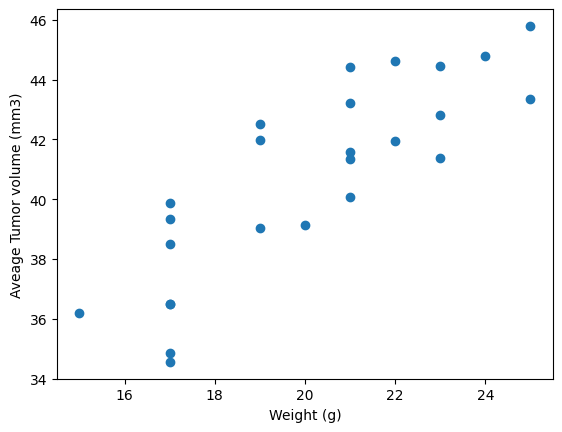

In [194]:
# create scatterplot
plt.scatter(avg_weight, avg_tumor, marker='o')
plt.xlabel("Weight (g)")
plt.ylabel("Aveage Tumor volume (mm3)")
plt.show()

In [195]:
### CORRELATION AND REGRESSION 

In [196]:
# calculate the correlation coefficient and linear regression model for mouse weight and avg tumor volume (capomlion)

In [197]:
# correlation coefficient
correlation = st.pearsonr(avg_weight,avg_tumor)
print(f"The correlation between mouse weight and average tumor volume is {round(correlation[0],2)}")

The correlation between mouse weight and average tumor volume is 0.84


In [198]:
# linear regression model 
(slope, intercept, rvalue, pvalue, stderr) = linregress(avg_weight, avg_tumor)
regress_values = avg_weight * slope + intercept
print(f" y = {round(slope,2)} x + {round(intercept,2)}")

 y = 0.95 x + 21.55


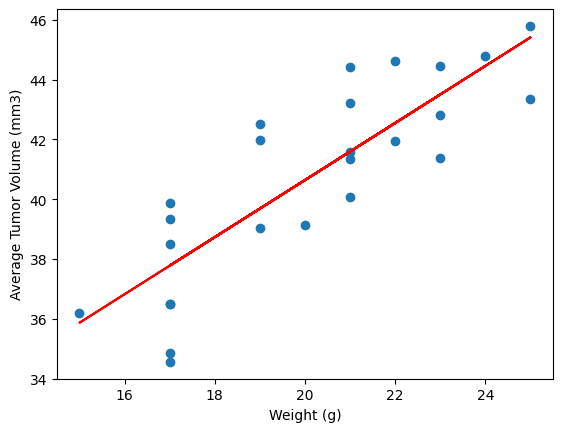

In [199]:
# plot scatter plot with line of regression
plt.scatter(avg_weight, avg_tumor)
plt.plot(avg_weight,regress_values,color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()